In [1]:
import numpy as np
import pandas as pd

female_matches = pd.read_csv('../data/all_female_matches.csv', low_memory=False)
female_matches.drop_duplicates(inplace=True)
female_matches.head()
female_matches.columns

Index(['Unnamed: 0', 'fab_matches___yr_raw', 'tournament_id', 'player_a_id',
       'assoc_a', 'name_a', 'player_b_id', 'assoc_b', 'name_b', 'player_x_id',
       'assoc_x', 'name_x', 'player_y_id', 'assoc_y', 'name_y', 'event',
       'stage', 'event_type', 'group', 'round', 'wo', 'res_a', 'res_x',
       'winner', 'winner_namer', 'winner_dbl', 'winner_dbl_names', 'kind',
       'team_match', 'seq_raw', 'inj', 'dsg', 'g1a', 'g1x', 'g2a', 'g2x',
       'g3a', 'g3x', 'g4a', 'g4x', 'g5a', 'g5x', 'g6a', 'g6x', 'g7a', 'g7x'],
      dtype='object')

In [2]:
# Split into singles and doubles - assoc_b has only nan values for null
#print(set(female_matches['assoc_b']))

fem_singles_df = female_matches[female_matches['assoc_b'].isna()]
fem_singles_df.drop(columns=['player_b_id', 'assoc_b', 'name_b', 'player_y_id', 'assoc_y', 'name_y'], inplace=True)
fem_singles_df['winner_bool'] = fem_singles_df['res_a'] > fem_singles_df['res_x']
fem_singles_df.head()

/tmp/ipykernel_7485/2189436675.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fem_singles_df.drop(columns=['player_b_id', 'assoc_b', 'name_b', 'player_y_id', 'assoc_y', 'name_y'], inplace=True)
/tmp/ipykernel_7485/2189436675.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fem_singles_df['winner_bool'] = fem_singles_df['res_a'] > fem_singles_df['res_x']


,Unnamed: 0,fab_matches___yr_raw,tournament_id,player_a_id,assoc_a,name_a,player_x_id,assoc_x,name_x,event,...,g3x,g4a,g4x,g5a,g5x,g6a,g6x,g7a,g7x,winner_bool
0,0,2006,"2006 - RUSSIAN Open, St. Petersburg (RUS)",100010.0,RUS,ABAIMOVA Elena (RUS) (100010),109068.0,SGP,SUN Beibei (SGP) (109068),WS,...,10.0,6.0,11.0,12.0,14.0,6.0,11.0,6.0,11.0,False
1,1,2006,"2006 - RUSSIAN Open, St. Petersburg (RUS)",108642.0,ENG,SIBLEY Kelly (ENG) (108642),100010.0,RUS,ABAIMOVA Elena (RUS) (100010),WS,...,10.0,9.0,11.0,8.0,11.0,5.0,11.0,NaN,NaN,False
2,2,2006,"2006 - RUSSIAN Open, St. Petersburg (RUS)",110531.0,RUS,DOLGIKH Maria (RUS) (110531),100010.0,RUS,ABAIMOVA Elena (RUS) (100010),WS,...,11.0,9.0,11.0,5.0,11.0,NaN,NaN,NaN,NaN,False
7,7,2011,"2011 - Belarus Open, Minsk (BLR)",100010.0,RUS,ABAIMOVA Elena (RUS) (100010),117206.0,BLR,ANTONAVA Antanina (BLR) (117206),WS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
8,8,2011,"2011 - Belarus Open, Minsk (BLR)",100010.0,RUS,ABAIMOVA Elena (RUS) (100010),108956.0,POL,STEFANSKA Kinga (POL) (108956),WS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [3]:
fem_doubles_df = female_matches[female_matches['assoc_b'].notna()]
fem_doubles_df.drop(columns=['g5a', 'g5x', 'g6a', 'g6x', 'g7a', 'g7x'], inplace=True)
fem_doubles_df['winner_bool'] = fem_singles_df['res_a'] > fem_singles_df['res_x']
fem_doubles_df.head()

/tmp/ipykernel_7485/2681205949.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fem_doubles_df.drop(columns=['g5a', 'g5x', 'g6a', 'g6x', 'g7a', 'g7x'], inplace=True)
/tmp/ipykernel_7485/2681205949.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fem_doubles_df['winner_bool'] = fem_singles_df['res_a'] > fem_singles_df['res_x']


,Unnamed: 0,fab_matches___yr_raw,tournament_id,player_a_id,assoc_a,name_a,player_b_id,assoc_b,name_b,player_x_id,...,dsg,g1a,g1x,g2a,g2x,g3a,g3x,g4a,g4x,winner_bool
3,3,2006,"2006 - RUSSIAN Open, St. Petersburg (RUS)",107035.0,WAL,OWEN Naomi (WAL) (107035),107573.0,BLR,PRIVALOVA Alexandra (BLR) (107573),100010.0,...,0,9.0,11.0,4.0,11.0,4.0,11.0,NaN,NaN,NaN
4,4,2006,"2006 - RUSSIAN Open, St. Petersburg (RUS)",105302.0,HUN,LI Bin (HUN) (105302),107302.0,HUN,PERGEL Szandra (HUN) (107302),100010.0,...,0,6.0,11.0,12.0,14.0,3.0,11.0,NaN,NaN,NaN
5,5,2006,"2006 - RUSSIAN Open, St. Petersburg (RUS)",100010.0,RUS,ABAIMOVA Elena (RUS) (100010),104936.0,RUS,KULAGINA Tatjana (RUS) (104936),108955.0,...,0,2.0,11.0,9.0,11.0,9.0,11.0,11.0,9.0,NaN
6,6,2006,"2006 - RUSSIAN Open, St. Petersburg (RUS)",100010.0,RUS,ABAIMOVA Elena (RUS) (100010),104936.0,RUS,KULAGINA Tatjana (RUS) (104936),104894.0,...,0,11.0,6.0,8.0,11.0,8.0,11.0,11.0,7.0,NaN
34,34,1988,"1988 - Olympic Games, Seoul (KOR)",103729.0,CZE,HRACHOVA Marie (CZE) (103729),90038.0,CZE,KASALOVA Renata (CZE) (90038),100025.0,...,0,21.0,10.0,8.0,21.0,21.0,19.0,NaN,NaN,NaN


In [4]:
import os
data_files = os.listdir('../data/matches_id')

male = 0
fem = 0

for file in data_files:
    if file.startswith('male'):
        male+=1
    else:
        fem+=1
print(male, fem)

25014 15790


In [5]:
# Get all male and all female players csv
import json
columns = 0
clean_data_list = []
        
for i in range(1, 50):
    with open('../data/female_players_part' + str(i) + '.json', 'r') as file:
        json_file = json.loads(file.read())
        if type(json_file) == str:
            json_file = json.loads(json_file)
        #print(type(json_file['data']))
        data_list = json_file['data'][0]
        #print(data_list)
        for i in range(len(data_list)):
            #player_id = d['data']['vw_profiles___player_id_raw']
            #print(type(d))
            if data_list[i]['data'] not in clean_data_list:
                clean_data_list.append(data_list[i]['data']) 
            columns = data_list[i]['data'].keys()

print(columns)

#clean_data_list = list(set(clean_data_list))
print(len(clean_data_list))
fem_players_df = pd.DataFrame.from_dict(clean_data_list)

#fem_players_df.head()
#fem_players_df.drop_duplicates(inplace=True)

print(fem_players_df.columns)

dict_keys(['vw_profiles___player_id', 'vw_profiles___player_id_raw', 'vw_profiles___name', 'vw_profiles___name_raw', 'vw_profiles___assoc_raw', 'vw_profiles___assoc', 'vw_profiles___gender', 'vw_profiles___gender_raw', 'vw_profiles___dob', 'vw_profiles___dob_raw', 'vw_profiles___age', 'vw_profiles___age_raw', 'vw_profiles___activity', 'vw_profiles___activity_raw', 'vw_profiles___handness', 'vw_profiles___handness_raw', 'vw_profiles___style', 'vw_profiles___style_raw', 'vw_profiles___grip', 'vw_profiles___grip_raw', 'vw_profiles___Totalmatches', 'vw_profiles___Totalmatches_raw', 'vw_profiles___Totalwins', 'vw_profiles___Totalwins_raw', 'vw_profiles___Totalloses', 'vw_profiles___Totalloses_raw', 'vw_profiles___Yearmatches', 'vw_profiles___Yearmatches_raw', 'vw_profiles___Yearwins', 'vw_profiles___Yearwins_raw', 'vw_profiles___Yearloses', 'vw_profiles___Yearloses_raw', 'vw_profiles___WTTC', 'vw_profiles___WTTC_raw', 'slug', '__pk_val', 'fabrik_select', 'fabrik_view_url', 'fabrik_edit_url'

In [6]:
keep_fem_players_df = fem_players_df
fem_players_df.drop(
    columns=[
        'vw_profiles___player_id' ,      'vw_profiles___name',
        'vw_profiles___assoc',
       'vw_profiles___gender',
        'vw_profiles___age', 
       'vw_profiles___activity', 
       'vw_profiles___handness', 
       'vw_profiles___style',  'vw_profiles___grip',
        'vw_profiles___Totalmatches',
        'vw_profiles___Totalwins',
        'vw_profiles___Totalloses',
        'vw_profiles___Yearmatches',
        'vw_profiles___Yearwins',
        'vw_profiles___Yearloses',
        'vw_profiles___WTTC',
        'slug', 'fabrik_select',
       'fabrik_view_url', 'fabrik_edit_url', 'fabrik_view', 'fabrik_edit',
       'fabrik_actions', 'vw_profiles___WTTC_raw', 'vw_profiles___dob', 'vw_profiles___dob_raw'
    ], inplace=True
)

In [7]:
fem_players_df.rename(
    columns={
        'vw_profiles___player_id_raw' : 'player_id', 
        'vw_profiles___name_raw' : 'name',
       'vw_profiles___assoc_raw' : 'association',
         'vw_profiles___gender_raw' : 'gender',
         'vw_profiles___age_raw':'age',
       'vw_profiles___activity_raw':'activity',
         'vw_profiles___handness_raw':'handness',
       'vw_profiles___style_raw':'style',
         'vw_profiles___grip_raw':'grip',
       'vw_profiles___Totalmatches_raw':'total_matches',
         'vw_profiles___Totalwins_raw':'total_wins',
       'vw_profiles___Totalloses_raw':'total_losses',
         'vw_profiles___Yearmatches_raw':'year_matches',
       'vw_profiles___Yearwins_raw':'year_wins',
         'vw_profiles___Yearloses_raw':'year_losses',
       'vw_profiles___WTTC_raw' : 'wttc', '__pk_val':'private_key'
    },
    inplace=True
)

In [8]:
fem_players_df.head()
keep_fem_players_df = fem_players_df.copy()

In [9]:
# clean age and wins/losses columns
fem_players_df['age'] = fem_players_df['age'].str[:2]
fem_players_df.head(10)

,player_id,name,association,gender,age,activity,handness,style,grip,total_matches,total_wins,total_losses,year_matches,year_wins,year_losses,private_key
0,113207,A'ASA Junella,ASA,W,46,T,-,-,-,0,0 (nan%),0 (nan%),0,0 (nan%),0 (nan%),113207
1,145778,AALTONEN Gabriela,SWE,W,13,T,RH,A,SH,11,3 (27%),8 (73%),0,0 (nan%),0 (nan%),145778
2,100004,AALTONEN Nina,FIN,W,42,F,None,None,None,0,0 (nan%),0 (nan%),0,0 (nan%),0 (nan%),100004
3,131033,AARONS HUGHES Ruth,USA,W,0,F,None,None,None,0,0 (nan%),0 (nan%),0,0 (nan%),0 (nan%),131033
4,145022,AARRAD Wahiba,MAR,W,20,T,RH,A,SH,0,0 (nan%),0 (nan%),0,0 (nan%),0 (nan%),145022
5,100006,AAS Merje,EST,W,46,T,None,None,None,0,0 (nan%),0 (nan%),0,0 (nan%),0 (nan%),100006
6,116168,AASEBO Anna,NOR,W,28,T,RH,A,SH,225,97 (43%),128 (57%),0,0 (nan%),0 (nan%),116168
7,110761,AASEBO Marte,NOR,W,33,T,RH,A,SH,190,59 (31%),131 (69%),0,0 (nan%),0 (nan%),110761
8,100010,ABAIMOVA Elena,RUS,W,46,T,-,-,-,24,17 (71%),7 (29%),0,0 (nan%),0 (nan%),100010
9,200145,ABARAVICIUTE Gabija,LTU,W,16,T,RH,A,SH,37,18 (49%),19 (51%),0,0 (nan%),0 (nan%),200145


In [10]:
# get player data in matches df
fem_players_df['total_wins'] = keep_fem_players_df['total_wins']
#a = fem_players_df['total_wins'].str.find('(')
#print(a)
fem_players_df['total_wins'] = fem_players_df['total_wins'].str.split(' ').str[0]
fem_players_df['total_losses'] = fem_players_df['total_losses'].str.split(' ').str[0]
fem_players_df['year_wins'] = fem_players_df['year_wins'].str.split(' ').str[0]
fem_players_df['year_losses'] = fem_players_df['year_losses'].str.split(' ').str[0]
fem_players_df.head()


,player_id,name,association,gender,age,activity,handness,style,grip,total_matches,total_wins,total_losses,year_matches,year_wins,year_losses,private_key
0,113207,A'ASA Junella,ASA,W,46,T,-,-,-,0,0,0,0,0,0,113207
1,145778,AALTONEN Gabriela,SWE,W,13,T,RH,A,SH,11,3,8,0,0,0,145778
2,100004,AALTONEN Nina,FIN,W,42,F,None,None,None,0,0,0,0,0,0,100004
3,131033,AARONS HUGHES Ruth,USA,W,0,F,None,None,None,0,0,0,0,0,0,131033
4,145022,AARRAD Wahiba,MAR,W,20,T,RH,A,SH,0,0,0,0,0,0,145022


In [14]:
a = fem_players_df['grip'].replace(0, pd.NA)
a = fem_players_df['grip'].replace([], pd.NA)
fem_players_df['grip'].replace('-', pd.NA)
#fem_players_df['grip'].replace(0, pd.NA)
#fem_players_df['grip'] = None if \
#fem_players_df['grip'].str == '[]' or \
#fem_players_df['grip'].str == '0' or \
#fem_players_df['grip'].str == '-' \
#else fem_players_df['grip'].str

for item in a:#fem_players_df['grip']:
    if type(item) == list:
        print('iem is list', item)
    #if type(item) != str and type(item) != "<class 'NoneType'>":
    #    print(type(item))

iem is list []
iem is list []
iem is list []


In [36]:
# add total wins
#fem_singles_df.insert(5, 'a_total_wins', fem_players_df[fem_players_df['total_wins'] ])
fem_players_df['player_id'] = pd.to_numeric(fem_players_df['player_id'])
fem_singles_df['points_a'] = fem_singles_df[['g1a', 'g2a','g3a', 'g4a','g5a', 'g6a', 'g7a']].sum(axis=1)
fem_singles_df['points_x'] = fem_singles_df[['g1x', 'g2x','g3x', 'g4x','g5x', 'g6x', 'g7x']].sum(axis=1)

#fem_singles_df['points_a'] = (fem_singles_df['g1a']) + (fem_singles_df['g2a']) + (fem_singles_df['g3a']) + (fem_singles_df['g4a']) + (fem_singles_df['g5a']) + (fem_singles_df['g6a']) + (fem_singles_df['g7a'])
#fem_singles_df['points_x'] = fem_singles_df['g1x'] + fem_singles_df['g2x'] + fem_singles_df['g3x'] + fem_singles_df['g4x'] + fem_singles_df['g5x'] + fem_singles_df['g6x'] + fem_singles_df['g7x']

fem_singles_df['points_x']

/tmp/ipykernel_7485/1717593252.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fem_singles_df['points_a'] = fem_singles_df[['g1a', 'g2a','g3a', 'g4a','g5a', 'g6a', 'g7a']].sum(axis=1)
/tmp/ipykernel_7485/1717593252.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fem_singles_df['points_x'] = fem_singles_df[['g1x', 'g2x','g3x', 'g4x','g5x', 'g6x', 'g7x']].sum(axis=1)


0         74.0
1         60.0
2         52.0
7          0.0
8          0.0
          ... 
606980    13.0
606981    25.0
606982    32.0
606983    78.0
606984    54.0
Name: points_x, Length: 465868, dtype: float64

In [191]:

fem_merged = pd.merge(fem_singles_df, fem_players_df, left_on='player_a_id', right_on='player_id')
fem_merged = pd.merge(fem_merged, fem_players_df, left_on='player_x_id', right_on='player_id', suffixes=('_a', '_x'))

# Create total points columns
sums_a = fem_merged.groupby('player_id_a')['points_a',].sum().reset_index()
sums_x = fem_merged.groupby('player_id_x')['points_x',].sum().reset_index()
sums_a.rename(columns={'player_id_a' : 'player_id'}, inplace=True)
sums_x.rename(columns={'player_id_x' : 'player_id'}, inplace=True)

sums_merged = pd.merge(sums_a, sums_x, on='player_id', how='outer')

# fill any missing values with zeros
sums_merged.fillna(0, inplace=True)

# create a new column that is the sum of data1 and data2 where both are present,
# otherwise just the value of data1 or data2
sums_merged['sum'] = sums_merged.apply(lambda row: row['points_a'] + row['points_x'], axis=1)
sums_merged.head()
sums_merged['player_id_a'] = sums_merged['player_id']
sums_merged['player_id_x'] = sums_merged['player_id']

# create another sample dataframe that uses the same ids
#fe = pd.DataFrame({'id': ['a', 'b', 'c', 'd'], 'data3': [7, 8, 9, 10]})

# perform a left join on the second dataframe with the merged dataframe
fem_merged_sums = pd.merge(fem_merged, sums_merged[['player_id_a', 'sum']], on='player_id_a', how='left')
fem_merged_sums.rename(columns={'sum':'total_points_a'}, inplace=True)
fem_merged_sums = pd.merge(fem_merged_sums, sums_merged[['player_id_x', 'sum']], on='player_id_x', how='left')
fem_merged_sums.rename(columns={'sum':'total_points_x'}, inplace=True)

# 52 duplicates in the female matches
#print(fem_merged_sums.astype(str).duplicated(keep=False).sum())
#fem_merged_sums.head()

# drop the original 'id' column
#fem_merged = fem_merged.drop('player_id', axis=1)

# re-order the columns as desired
#merged = merged[['id_a', 'data1_a', 'data2_a', 'data3_a', 'id_b', 'data1_b', 'data2_b', 'data3_b']]

#fem_singles_df['a_total_wins'] = fem_players_df[fem_players_df['total_wins']]
#sums

#fem_merged.head()

/tmp/ipykernel_7485/4075565340.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'name_a'} in the result is deprecated and will raise a MergeError in a future version.
  fem_merged = pd.merge(fem_merged, fem_players_df, left_on='player_x_id', right_on='player_id', suffixes=('_a', '_x'))


In [192]:
fem_merged_sums.to_csv('merged_fem_sums_dataset.csv')

In [193]:
fem_merged_sums = pd.read_csv('merged_fem_sums_dataset.csv')

/tmp/ipykernel_7485/1835075426.py:1: DtypeWarning: Columns (13,21) have mixed types. Specify dtype option on import or set low_memory=False.
  fem_merged_sums = pd.read_csv('merged_fem_sums_dataset.csv')


In [194]:
fem_merged_sums.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'fab_matches___yr_raw', 'tournament_id',
       'player_a_id', 'assoc_a', 'name_a', 'player_x_id', 'assoc_x', 'name_x',
       'event', 'stage', 'event_type', 'group', 'round', 'wo', 'res_a',
       'res_x', 'winner', 'winner_namer', 'winner_dbl', 'winner_dbl_names',
       'kind', 'team_match', 'seq_raw', 'inj', 'dsg', 'g1a', 'g1x', 'g2a',
       'g2x', 'g3a', 'g3x', 'g4a', 'g4x', 'g5a', 'g5x', 'g6a', 'g6x', 'g7a',
       'g7x', 'winner_bool', 'points_a', 'points_x', 'player_id_a', 'name_a.1',
       'association_a', 'gender_a', 'age_a', 'activity_a', 'handness_a',
       'style_a', 'grip_a', 'total_matches_a', 'total_wins_a',
       'total_losses_a', 'year_matches_a', 'year_wins_a', 'year_losses_a',
       'private_key_a', 'player_id_x', 'name_x.1', 'association_x', 'gender_x',
       'age_x', 'activity_x', 'handness_x', 'style_x', 'grip_x',
       'total_matches_x', 'total_wins_x', 'total_losses_x', 'year_matches_x',
       'year_wins_x', 'year_l

In [195]:
fem_merged_sums.drop(columns=[
       'Unnamed: 0.1', 'Unnamed: 0',
       'player_a_id', 'assoc_a', 'name_a', 'player_x_id', 'assoc_x', 'name_x',
       'winner_dbl', 'winner_dbl_names','private_key_a', 'private_key_x'
       ], inplace=True)

In [ ]:
'Unnamed: 0', 'fab_matches___yr_raw', 'tournament_id'
                         ,'event',
       'stage', 'event_type', 'group', 'round', 'wo', 'res_a', 'res_x',
       'winner', 'winner_namer', 'kind',
       'team_match', 'seq_raw', 'inj', 'dsg', 'g1a', 'g1x', 'g2a', 'g2x',
       'g3a', 'g3x', 'g4a', 'g4x', 'g5a', 'g5x', 'g6a', 'g6x', 'g7a', 'g7x',
       'winner_bool', 'player_id_a', 'name_a', 'association_a', 'gender_a',
       'age_a', 'activity_a', 'handness_a', 'style_a', 'grip_a',
       'total_matches_a', 'total_wins_a', 'total_losses_a', 'year_matches_a',
       'year_wins_a', 'year_losses_a', 'player_id_b',
       'name_b', 'association_b', 'gender_b', 'age_b', 'activity_b',
       'handness_b', 'style_b', 'grip_b', 'total_matches_b', 'total_wins_b',
       'total_losses_b', 'year_matches_b', 'year_wins_b', 'year_losses_b'

In [197]:
y = fem_merged_sums['winner_bool'].map({True:1, False:0})
y

0         0
1         0
2         0
3         1
4         0
         ..
465478    0
465479    0
465480    0
465481    0
465482    1
Name: winner_bool, Length: 465483, dtype: int64

In [238]:
#y = fem_merged_sums['winner_bool']

X = fem_merged_sums.drop(columns=[#'winner', 'winner_namer', 'winner_bool', 'player_id_a', 'name_x', 'player_id_x', 'name_x',
                             'g1a', 'g1x', 'g2a', 'g2x',
       'g3a', 'g3x', 'g4a', 'g4x', 'g5a', 'g5x', 'g6a', 'g6x', 'g7a', 'g7x'])
X.drop(columns=['inj', 'points_a', 'points_x', 'wo', 'name_x.1', 'name_a.1', 'res_a','res_x', 'gender_a', 'gender_x','tournament_id', 'group','winner', 'winner_namer','winner_bool','player_id_a','player_id_x', 'style_x', 'grip_x', 'style_a', 'grip_a','team_match', 'handness_a', 'handness_x'], inplace=True)
#X.columns
y

0         0
1         0
2         0
3         1
4         0
         ..
465478    0
465479    0
465480    0
465481    0
465482    1
Name: winner_bool, Length: 465483, dtype: int64

In [239]:
event_map = {'WS' : 0, 'U21WS': 1, 'WT': 0, 'JGT': 2, 'CGS': 3, 'JGS': 2, 'CGT': 3, 'JGD': 2, 'YOGT': 4,
       'XT': 0, 'WT_U21': 1, 'U21WT': 1, 'U19WT': 2, 'U19WS': 2, 'U17WS': 2, 'CBS': 3, 'MCGS': 5,
       'WD': 0, 'U15WT': 3, 'HGS': 0, 'JBT':2, 'U19GS':2, 'CGD':2, 'U15WS':2, 'MT':0,
       'U13WS':4, 'U11WS':5}

# use the map method to replace the color column with integers
X['event'] = X['event'].map(event_map)

In [240]:
X['stage'].unique()

stage_map = {'Main Draw' : 2, 'Qualification': 1, 'Pre. Round': 1, 'Preliminary': 1,
       'Consolation': 3, 'Qualification - 2nd Stage': 1, 'Main Draw - Day 1': 2,
       'Qualification - Division 2': 1, 'Main Draw - Division 2': 2, pd.NA:0,
       'Position matches - Division 1': 2, 'Qualification - Division 1': 1,
       'Position Draw': 2, 'Qualification - Division 3': 1,
       'Main Draw - Division 1': 2, 'Position matches - Division 3': 2,
       'Position matches 69- Division 3':2, 'Main Draw - Division 3':2,
       'Main Draw - Stage 2':2, 'Main Draw - Stage 2 (Bronze Match)':2,
       'Position matches 57-60 - Division 3':2, 'Main Draw C': 2,
       'Main Draw B': 2, 'Position matches - Division 2': 2,
       'Main Draw - Day 2': 2, 'Main Draw A': 2,
       'Main Draw - Stage 2 (5-8th place)': 2,
       'Position matches 61-64 - Division 3': 2, 'MAIN': 2, 'GROUPS': 1,
       'Main Draw - Stage 1': 2, 'MAIN|5|8': 2,
       'Main Draw - Stage 2 (5th place)': 2,
       'Main Draw - Stage 2 (7th place)': 2}

X['stage'] = X['stage'].map(stage_map)

In [241]:
X['event_type'].unique()

event_type_map = {'KO':2, 'Group':1, 'Progressive':3, 'Progressive KO':3, 'GP12':4, pd.NA:0,
       'R32-':6, '8FNL':7, 'QFNL':8, 'RND2':6, 'R64-':5, 'RND1':5, 'FNL-':10, 'SFNL':9,
       'GP05':4, 'GP03':4, 'GP11':4, 'GP01':4, 'GP06':4, 'GP13':4, 'GP08':4, 'GP02':4,
       'GP14':4, 'GP04':4, 'GP10':4, 'GP09':4, 'GP07':4}

X['event_type'] = X['event_type'].map(event_type_map)

In [242]:
ass = X['association_a'].unique().tolist() + X['association_x'].unique().tolist()
ass = list(set(ass))
association_map = {}
for i in range(len(ass)):
    association_map[ass[i]] = i+1
print(association_map)
X['association_a'] = X['association_a'].map(association_map)
X['association_x'] = X['association_x'].map(association_map)


{'PAN': 1, 'MGL': 2, 'SUR': 3, 'CHA': 4, 'BIZ': 5, 'KIR': 6, 'ARU': 7, 'FIN': 8, 'MLI': 9, 'CRO': 10, 'INA': 11, 'SEN': 12, 'FIJ': 13, 'TUR': 14, 'BRN': 15, 'CAN': 16, 'CIV': 17, 'DEN': 18, 'RUS': 19, 'NED': 20, 'BEN': 21, 'RSA': 22, 'TAN': 23, 'ALB': 24, 'BRU': 25, 'SAM': 26, 'FSM': 27, 'THA': 28, 'SLE': 29, 'SRI': 30, 'IRI': 31, 'AUS': 32, 'ENG': 33, 'BAR': 34, 'CYP': 35, 'TOG': 36, 'IRQ': 37, 'PLW': 38, 'VIE': 39, 'KAZ': 40, 'NCA': 41, 'MYA': 42, 'MAS': 43, 'USA': 44, 'DOM': 45, 'AFG': 46, 'LBN': 47, 'FRO': 48, 'ZAM': 49, 'SYR': 50, 'UKR': 51, 'CZE': 52, 'DJI': 53, 'LUX': 54, 'MAF': 55, 'AUT': 56, 'JOR': 57, 'VIN': 58, 'COK': 59, 'ITA': 60, 'TKM': 61, 'SKN': 62, 'PYF': 63, 'GUA': 64, 'TTO': 65, 'ESP': 66, 'IND': 67, 'HUN': 68, 'BEL': 69, 'PRK': 70, 'LBA': 71, 'BAN': 72, 'IMN': 73, 'SRB': 74, 'BIH': 75, 'CGO': 76, 'BLR': 77, 'TGA': 78, 'LCA': 79, 'KOS': 80, 'TUV': 81, 'MRI': 82, 'TJK': 83, 'NIG': 84, 'SGP': 85, 'LBR': 86, 'URU': 87, 'GEO': 88, 'QAT': 89, 'CUW': 90, 'TKL': 91, 'POR': 

In [243]:
activity_map = {'T': 2, 'F':1}
X['activity_a'] = X['activity_a'].map(activity_map)
X['activity_x'] = X['activity_x'].map(activity_map)

In [244]:
X.fillna(0, inplace=True)
X = X.astype({'stage': 'int32', 'age_a':'int32', 'age_x':'int32',
              'total_matches_a':'int32','total_wins_a':'int32',
              'total_losses_a':'int32', 'year_matches_a':'int32',
            'year_wins_a':'int32', 'year_losses_a':'int32',
             'total_matches_x':'int32','total_wins_x':'int32',
              'total_losses_x':'int32', 'year_matches_x':'int32',
            'year_wins_x':'int32', 'year_losses_x':'int32' })
#X['total_matches_a'].unique()
X.dtypes

fab_matches___yr_raw      int64
event                     int64
stage                     int32
event_type              float64
round                   float64
kind                      int64
seq_raw                 float64
dsg                       int64
association_a             int64
age_a                     int32
activity_a              float64
total_matches_a           int32
total_wins_a              int32
total_losses_a            int32
year_matches_a            int32
year_wins_a               int32
year_losses_a             int32
association_x             int64
age_x                     int32
activity_x              float64
total_matches_x           int32
total_wins_x              int32
total_losses_x            int32
year_matches_x            int32
year_wins_x               int32
year_losses_x             int32
total_points_a          float64
total_points_x          float64
dtype: object

In [245]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
np_y = y.to_numpy()
#feature_cols = X.columns
#new_X = X[feature_cols]
#print(new_X)
X_train, X_test, y_train, y_test = train_test_split(X, np_y, test_size=0.15, random_state=42)
print(X_test.dtypes)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)#, y_test)
#y.dtype
#X.columns

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

fab_matches___yr_raw      int64
event                     int64
stage                     int32
event_type              float64
round                   float64
kind                      int64
seq_raw                 float64
dsg                       int64
association_a             int64
age_a                     int32
activity_a              float64
total_matches_a           int32
total_wins_a              int32
total_losses_a            int32
year_matches_a            int32
year_wins_a               int32
year_losses_a             int32
association_x             int64
age_x                     int32
activity_x              float64
total_matches_x           int32
total_wins_x              int32
total_losses_x            int32
year_matches_x            int32
year_wins_x               int32
year_losses_x             int32
total_points_a          float64
total_points_x          float64
dtype: object
Accuracy: 0.9540982197843118


In [246]:
importances = clf.feature_importances_

In [247]:
print(importances)

[6.10395441e-02 1.70772094e-02 1.46308075e-02 9.63068582e-03
 4.18077308e-02 6.74028865e-05 5.79953878e-02 1.39557281e-05
 4.39046500e-02 4.26454829e-02 1.01562383e-03 3.38395247e-02
 1.35114190e-01 7.66702538e-02 5.40170291e-03 5.40824527e-03
 6.54845970e-03 3.78067346e-02 3.92280621e-02 7.52419269e-04
 2.90977881e-02 1.37325490e-01 8.36014319e-02 4.65921404e-03
 4.04833133e-03 5.03066217e-03 5.42550720e-02 5.13839379e-02]


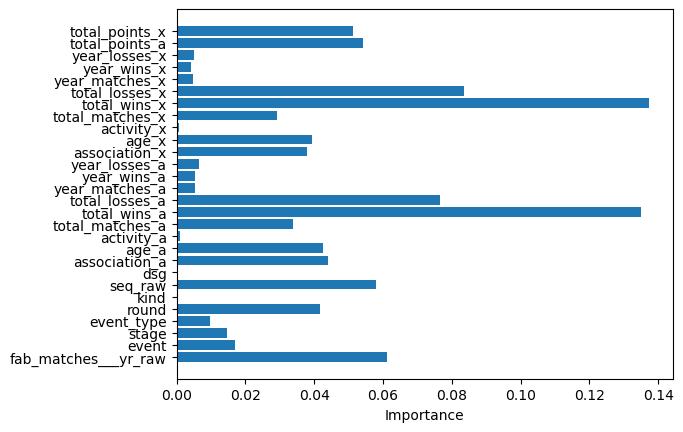

In [248]:
import matplotlib.pyplot as plt
plt.barh(range(len(importances)), importances)
plt.yticks(range(len(importances)), X.columns)
plt.xlabel('Importance')
plt.show()